### Perceptron

In [1]:
# 导入相关库
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
df.label.value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

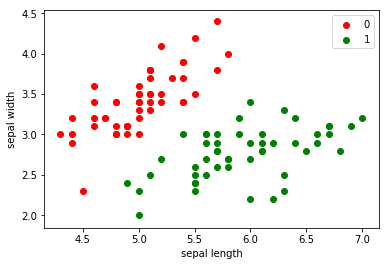

In [3]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], c='red', label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], c='green', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend();

In [4]:
df.head()

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
data = np.array(df.iloc[:100, [0, 1, -1]])
X, y = data[:,:-1], data[:,-1]
y = np.array([1 if i == 1 else -1 for i in y])
print(X.shape, y.shape)

(100, 2) (100,)


In [6]:
# 定义参数初始化函数
def initialize_parameters(dim):
    w = np.zeros(dim, dtype=np.float32)
    b = 0.0
    return w, b

In [7]:
# 定义sign符号函数
def sign(x, w, b):
    return np.dot(x,w)+b

In [23]:
# 定义感知机训练函数
def train(X_train, y_train, learning_rate):
    # 参数初始化
    w, b = initialize_parameters(X_train.shape[1])
    # 初始化误分类
    is_wrong = False
    while not is_wrong:
        wrong_count = 0
        for i in range(len(X_train)):
            X = X_train[i]
            y = y_train[i]
            # 如果存在误分类点
            # 更新参数
            # 直到没有误分类点
            if y * sign(X, w, b) <= 0:
                w = w + learning_rate*np.dot(y, X)
                b = b + learning_rate*y
                wrong_count += 1
        if wrong_count == 0:
            is_wrong = True
            print('There is no missclassification!')
        
        # 保存更新后的参数
        params = {
            'w': w,
            'b': b
        }
    return params

In [24]:
params = train(X, y, 0.01)

There is no missclassification!


In [25]:
params

{'b': -1.2400000000000009, 'w': array([ 0.79 , -1.007])}

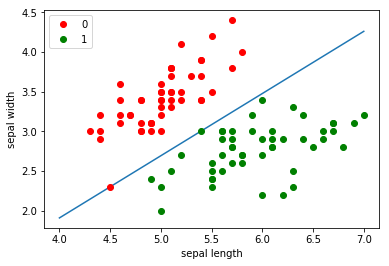

In [26]:
x_points = np.linspace(4, 7, 10)
y_hat = -(params['w'][0]*x_points + params['b'])/params['w'][1]
plt.plot(x_points, y_hat)

plt.plot(data[:50, 0], data[:50, 1], color='red', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], color='green', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [ ]:
class Perceptron:
    def __init__(self):
        pass
    
    def sign(self, x, w, b):
        return np.dot(x, w) + b
    
    def train(self, X_train, y_train, learning_rate):
        # 参数初始化
        w, b = self.initilize_with_zeros(X_train.shape[1])
        # 初始化误分类
        is_wrong = False
        while not is_wrong:
            wrong_count = 0
            for i in range(len(X_train)):
                X = X_train[i]
                y = y_train[i]
                # 如果存在误分类点
                # 更新参数
                # 直到没有误分类点
                if y * self.sign(X, w, b) <= 0:
                    w = w + learning_rate*np.dot(y, X)
                    b = b + learning_rate*y
                    wrong_count += 1
            if wrong_count == 0:
                is_wrong = True
                print('There is no missclassification!')

            # 保存更新后的参数
            params = {
                'w': w,
                'b': b
            }
        return params